# Sandbox for testing purposes

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.linalg import block_diag

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
# from cereeberus.data.ex_mergetrees import randomMergeTree

from cereeberus.distance.interleave import Interleave
from cereeberus.distance.labeled_blocks import LabeledBlockMatrix as LBM 
from cereeberus.distance.labeled_blocks import LabeledMatrix as LM

In [2]:
cols_dict = {1: ['a','b'], 2: ['c','d','e']}
rows_dict = {0: ['u'], 1: ['v','w'], 2: ['x']}
map_dict = {'a': 'v', 'b':'v', 'c': 'x', 'd':'x', 'e':'x'}

lbm = LBM(map_dict, rows_dict, cols_dict)
lbm.to_labeled_matrix()

LabeledMatrix(
array=
[[0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1.]], 
rows=['u', 'v', 'w', 'x'], 
cols=['a', 'b', 'c', 'd', 'e'])

<class 'numpy.ndarray'>


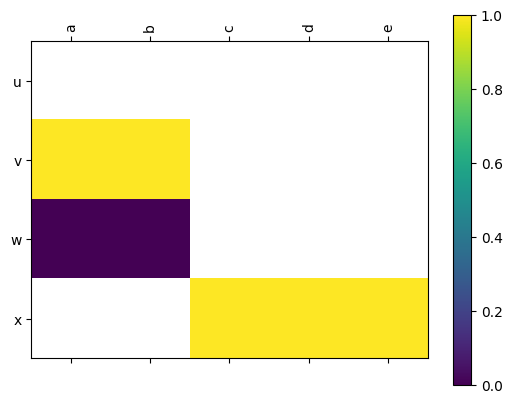

In [5]:
lbm.draw(filltype = 'nan', colorbar = True)

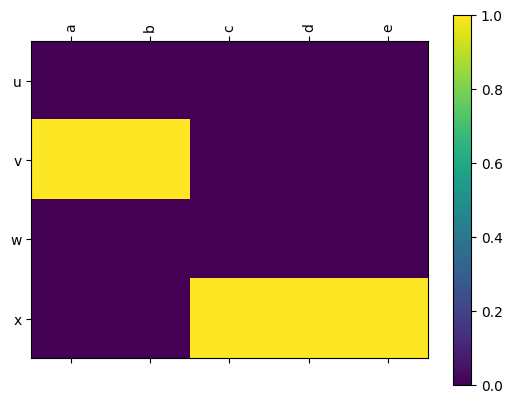

In [8]:
lbm.draw( colorbar = True)

In [10]:
lbm[1]['v', 'a']

1.0

In [4]:
all_keys = list(set(rows_dict.keys()) | set(cols_dict.keys()))
all_keys.sort()
all_keys

blocks = {}
for i in all_keys:
    if i in rows_dict:
        rows_ = rows_dict[i]
    else:
        rows_ = []

    if i in cols_dict:
        cols_ = cols_dict[i]
    else:
        cols_ = []
    
    blocks[i] = LM(rows = rows_, cols = cols_)

    if cols_ and rows_:
        print('setting entries')
        for c in cols_:
            # print(f"cols: {c}")
            r = map_dict[c]
            # print(f"(r,c) = ({r},{c})")
            # print(blocks[i])
            blocks[i][r,c]  = 1 
            # print(blocks[i])
    print(f"\nblock {i}: {blocks[i]}")

blocks


block 0: LabeledMatrix(
array=
[], 
rows=['u'], 
cols=[])
setting entries

block 1: LabeledMatrix(
array=
[[1. 1.]
 [0. 0.]], 
rows=['v', 'w'], 
cols=['a', 'b'])
setting entries

block 2: LabeledMatrix(
array=
[[1. 1. 1.]], 
rows=['x'], 
cols=['c', 'd', 'e'])


{0: LabeledMatrix(
 array=
 [], 
 rows=['u'], 
 cols=[]),
 1: LabeledMatrix(
 array=
 [[1. 1.]
  [0. 0.]], 
 rows=['v', 'w'], 
 cols=['a', 'b']),
 2: LabeledMatrix(
 array=
 [[1. 1. 1.]], 
 rows=['x'], 
 cols=['c', 'd', 'e'])}